# Assignment Week 2

In this Assignment, you will explore the **FIFA 19** dataset, which contains detailed attributes for every player registered in the latest edition of FIFA 19 database.    
It was scrapped from this [website](https://sofifa.com/), and you can find the source code [here](https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019).

Your goal is to find out how the `Overall` score by player is calculated

There are 2 main parts:

* Data Import & Cleaning, the output of this part is provided in the csv file `Assignment_2_data_cleaned`, **so you do not need to have everything right in this part to do the second one**
* Modeling with the cleaned data

In the notebook, there will be cells in the form `assert condition` like the next one. They are used to check if an answer is correct.  
Execute the next one and you will get no errors

In [101]:
assert 3 < 5

Execute the next one and you will get an error

In [102]:
#assert 3 > 5

# Data Import

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1.1. Load the csv file `data.csv` into a dataframe called `df` and print its shape. (Set the right parameters when reading the csv file)       

In [104]:
df = pd.read_csv('Assignment_2_data.csv',index_col=0)
df.shape

(18207, 88)

In [105]:
# check if your answer is correct
assert df.shape == (18207, 88)

1.2. print the head of `df`

In [106]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


1.3. Print how many columns that are in df columns types

In [107]:
len(df.columns)

88

1.4. `to_drop` is a list containing columns that are not useful for modeling, remove them and print the new shape of `df`

In [108]:
to_drop =['ID', 'Name', 'Photo','Nationality', 'Flag','Club','Club Logo', 'Real Face', 'Joined', 'Loaned From', 'Contract Valid Until']
# your code here
df.drop(to_drop, axis =1, inplace=True)
df.shape

(18207, 77)

In [109]:
# check if your answer is correct
assert df.shape == (18207, 77)

# Data Cleaning

## Handling missing values

2.1. Build a dataframe called `missing` which has the following format:

* `pct` is the percentage of missing values, **takes values between `0` and `100`**
* the index is the column names

|     | pct |
|-----|-----|
|......|.....|
|Strength |0.263635|
|.....|.....|



In [110]:
missing = pd.DataFrame(index= df.columns,columns=["pct"])
missing["pct"] = (df.isnull().sum() / len(df.index))*100
missing

,pct
Age,0.000000
Overall,0.000000
Potential,0.000000
Value,0.000000
Wage,0.000000
...,...
GKHandling,0.263635
GKKicking,0.263635
GKPositioning,0.263635
GKReflexes,0.263635


2.2. Remove from `missing`, rows with `pct`= 0   
sort `missing` in ascending order of `pct` and print its head

In [111]:
# your code here
missing = missing[missing.pct != 0]
missing.sort_values("pct",axis =0,ascending=True,inplace = True)
missing.head

/usr/local/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<bound method NDFrame.head of                       pct
Preferred Foot   0.263635
Strength         0.263635
Stamina          0.263635
Jumping          0.263635
ShotPower        0.263635
...                   ...
RWB             11.451639
LB              11.451639
LCB             11.451639
RCB             11.451639
RB              11.451639

[71 rows x 1 columns]>

2.3. Now, let's fill missing values where the % of missing is lower than 1 (1%).   
First identify these columns in a list named `cols_to_fill`

In [112]:
# your code here
cols_to_fill = missing[missing.pct < 1].index.values.tolist()
print(len(cols_to_fill), type(cols_to_fill))

44 <class 'list'>


In [113]:
# check if your answer is correct
assert len(cols_to_fill) == 44; assert isinstance(cols_to_fill, list)

2.4. define a function (`fill_nas_by_type`) to fill null values by column type:

* if a column type is `Object`, fill it with the **most frequent value**
* otherwise, fill it with the **median value**

In [114]:
def fill_nas_by_type(df, col_name):
    """Fill null values in df according to col_name type
    
    Parameters
    ----------
    df : dataframe, (default=None)
        input dataframe
    col_name : str, (default=None)
        column with null values to fill
        
    Returns
    -------
    df with filled values in col_name
    """
    # your code here
    if isinstance(df[col_name],object):
        df = df.fillna(value= {col_name: df[col_name].mode().iloc[0]})
    else:
        df = df.fillna(value={col_name: df[col_name].median()})
    return df

Loop through `cols_to_fill` and apply the defined function `fill_nas_by_type` to fill null values

In [115]:
# your code here
for i in cols_to_fill:
    df = fill_nas_by_type(df,i)
    

In [116]:
# check if your answer is correct
assert df[cols_to_fill].isnull().sum().sum() == 0

For the remaining missing values, let's just remove them.    
Print the shape of `df` before and after removing any rows with missing observations

In [117]:
# your code here
print(df.shape)
df = df.dropna(axis=0,how="any")
print(df.shape)

(18207, 77)
(14743, 77)


In [118]:
# check if your answer is correct
assert df.shape == (14743, 77); assert df.isnull().sum().sum() == 0

## Correct some columns format

### Monetary columns

In [119]:
money_cols = ['Value','Wage', 'Release Clause']
df[money_cols].head()

,Value,Wage,Release Clause
0,€110.5M,€565K,€226.5M
1,€77M,€405K,€127.1M
2,€118.5M,€290K,€228.1M
4,€102M,€355K,€196.4M
5,€93M,€340K,€172.1M


3.1. Build a function which extracts the monetary value from a string. It should return a number with no decimals.   
Your function should pass the three tests in the cell after

In [120]:
def get_value(value_text):
    """Extract the monetary value from a string
    
    Parameters
    ----------
    value_text: str, (default=None)
        a string containing a number ending with M, K or nothing
        
    Returns
    -------
    a float with no decimals
    
    Examples
    --------
    >>> get_value('€7.1K')
    7100.0
    """
    multiplier = value_text[-1]
    if multiplier == 'M':
        number = float(value_text[1:-1])
        return number * 1000000
    elif multiplier == 'K':
        number = float(value_text[1:-1])
        return number * 1000
    else:
        return float(value_text[1:])    

In [121]:
# check if your answer is correct
assert get_value('€110.5M') == 110500000; assert get_value('€7.1K') == 7100; assert get_value('€200') == 200

3.2. Loop through `money_cols` and apply the defined function `get_value` to convert them to numeric

In [122]:
for f in money_cols:
    df[f] =df[f].apply(get_value)
    print(f, df[f].dtype, df[f].isnull().sum())

Value float64 0
Wage float64 0
Release Clause float64 0


In [123]:
# check if your answer is correct
assert df[money_cols].isnull().sum().sum() == 0

### Height and Weight columns

4.1. Start by printing the unique values for `Height`

In [124]:
# print unique values for Height
df['Height'].unique()

array(["5'7", "6'2", "5'9", "5'11", "5'8", "6'0", "5'6", "5'10", "6'1",
       "5'4", "6'3", "6'4", "5'5", "6'6", "6'5", "5'3", "5'2", "6'7",
       "5'1", "6'8"], dtype=object)

4.2. Write a function (`get_height`) which converts the Height from a string in feet to  a number in `cm` with no decimals.    
1 feet = 30.48 cm. For example `get_height("5'10")` = `155`

In [125]:
def get_height(x):
    return  round(float(x.replace("'", ".")) * 30.48, 0) 

In [126]:
# check if your answer is correct
assert get_height("5'10") == 155; assert get_height("6'8") == 207

Apply the previous defined function on `Height`

In [127]:
df['Height'] = df['Height'].apply(get_height)

In [128]:
# check if your answer is correct
assert df['Height'].dtype == 'float64'; assert df['Height'].isnull().sum() == 0

4.3. The same thing with `Weight`, print the unique values

In [129]:
# print unique values for Weight
df['Weight'].unique()

array(['159lbs', '183lbs', '150lbs', '154lbs', '163lbs', '146lbs',
       '190lbs', '181lbs', '176lbs', '168lbs', '172lbs', '148lbs',
       '165lbs', '196lbs', '161lbs', '170lbs', '187lbs', '157lbs',
       '185lbs', '130lbs', '174lbs', '203lbs', '207lbs', '134lbs',
       '141lbs', '152lbs', '179lbs', '132lbs', '198lbs', '201lbs',
       '209lbs', '214lbs', '143lbs', '192lbs', '137lbs', '194lbs',
       '139lbs', '220lbs', '205lbs', '216lbs', '126lbs', '123lbs',
       '128lbs', '223lbs', '212lbs', '121lbs', '115lbs', '218lbs',
       '117lbs', '243lbs', '110lbs', '119lbs', '234lbs'], dtype=object)

4.4. Write a function (`get_weight`) which converts the **Weight** from a string in `lbs` to a number in `kg` with no decimals.    
1 lbs = 0.453592 kg. For example `get_weight("115lbs")` = `52`

In [130]:
def get_weight(x):
    return  round(float(x.split('lbs')[0]) * 0.453592, 0)

In [131]:
# check if your answer is correct
assert get_weight("115lbs") == 52; assert get_weight("234lbs") == 106

Apply the previous defined function on `Weight`

In [132]:
df['Weight'] = df['Weight'].apply(get_weight)

In [133]:
# check if your answer is correct
assert df['Weight'].dtype == 'float64'; assert df['Weight'].isnull().sum() == 0

## Convert text columns to numeric

5.1. Identify non-numeric text columns in a list called `text_cols`

In [134]:
# your code here
text_cols = df.select_dtypes(exclude=np.number).columns
print(len(text_cols))

30


5.2. Build a list named `cols_to_remove` containing columns from `text_cols`, if a column has a number of unique values greater than **10** (`> 10`)

In [135]:
# your code here
cols_to_remove=[]
for col in text_cols:
    if df[col].nunique()>10:
        cols_to_remove.append(col)

print(len(cols_to_remove))

27


remove `cols_to_remove` columns from `df` and print its shape

In [136]:
# your code here
df.drop(cols_to_remove,axis=1,inplace=True)
df.shape

(14743, 50)

In [137]:
# check if your answer is correct
assert df.shape == (14743, 50)

5.3. Identify the remaining text columns in `text_cols` as `remaining_text_cols`, make sur it passes the test after

In [138]:
# your code here
remaining_text_cols = text_cols.tolist()

for i in cols_to_remove:
    remaining_text_cols.remove(i)

print(len(remaining_text_cols))

3


In [139]:
# check if your answer is correct
assert remaining_text_cols == ['Preferred Foot', 'Work Rate', 'Body Type']

5.4. Loop through `remaining_text_cols` and convert them to numerical values

In [140]:
# your code here
for col in remaining_text_cols:
    df[col] = df[col].astype(str).astype("category").cat.codes
print(df)
    
    

       Age  Overall  Potential        Value      Wage  Special  \
0       31       94         94  110500000.0  565000.0     2202   
1       33       94         94   77000000.0  405000.0     2228   
2       26       92         93  118500000.0  290000.0     2143   
4       27       91         92  102000000.0  355000.0     2281   
5       27       91         91   93000000.0  340000.0     2142   
...    ...      ...        ...          ...       ...      ...   
18202   19       47         65      60000.0    1000.0     1307   
18203   19       47         63      60000.0    1000.0     1098   
18204   16       47         67      60000.0    1000.0     1189   
18205   17       47         66      60000.0    1000.0     1228   
18206   16       46         66      60000.0    1000.0     1321   

       Preferred Foot  International Reputation  Weak Foot  Skill Moves  ...  \
0                   0                       5.0        4.0          4.0  ...   
1                   1                       5.0

In [141]:
df.shape

(14743, 50)

# Model building

As stated before, you can do this part without completing the previous one

6.1. Load the cleaned dataset `Assignment_2_data_cleaned.csv` into `df_clean` and print its shape.    

In [142]:
# your code here
df_clean = pd.read_csv('Assignment_2_data_cleaned.csv',index_col=0)
df_clean.shape


(14743, 49)

6.2. Load the target variable `Overall` into a dataframe and name it `y`. Then, load the features into a second dataframe and name it `X`. Plot a histogram of `y`, choose the number of bins as 100.

<AxesSubplot:>

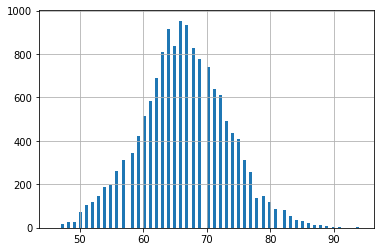

In [143]:
# your code here
y = df_clean.Overall
x = df_clean.drop('Overall', axis=1, inplace=False)

y.hist(bins = 100)


7. Split the data set into a training set and a test set. Choose `test_size` = 0.3 and `random_state` = 123  
Print train and test size      
**Attention**: You are asked to use  [`sklearn.model_selection`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [144]:
# your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=123)
print("Training size :", len(X_train),"Testing size :",len(X_test))

Training size : 10320 Testing size : 4423


8. Fit a linear model to the training set, and then report the training and testing errors obtained (the R2 statistic).   
Calculate and print the following metrics: mse, rmse, mae for the test_set

In [145]:
# your code here
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

#here we can print the score (not asked)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print  ('Training score =' , train_score)
print  ('Testing score = {}'.format(test_score))

Training score = 0.9040619876078273
Testing score = 0.9053913285969968


In [146]:
# your code here
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math

y_pred = reg.predict(X_test) 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print ('mse = {}, rmse = {} \nmae = {} r2 = {}'.format(mse,math.sqrt(mse), mae, r2))

mse = 4.4262982266461925, rmse = 2.1038769514033353 
mae = 1.640498314368863 r2 = 0.9053913285969968


### Check residuals

9.1. Plot a histogram of the residuals (difference between `y_test` and `y_pred`

<AxesSubplot:>

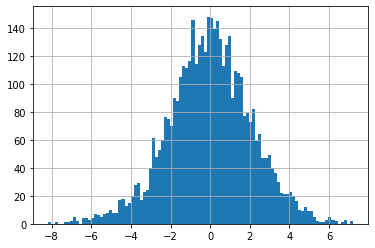

In [147]:
# your code here
residuals = y_test - y_pred
residuals.hist(bins = 100)

9.2. Plot a scatter plot where `y_test` is in the **x** axis and  `y_pred` is in the **y** axis

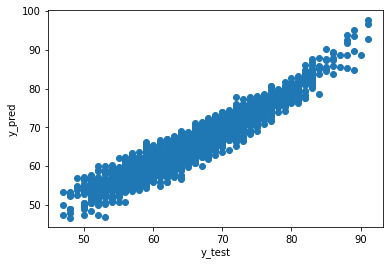

In [148]:
# your code here
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

10. Try to improve the performance of your model, by adding new features

In [149]:
# your code here
for overall in df_clean.Overall.unique():
    col='is_'+ str(overall)
    df_clean[col]= (df_clean.Overall == overall).astype("int")
print (df_clean.columns)


Index(['Overall', 'Potential', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Jersey Number', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'is_94',
       'is_92', 'is_91', 'is_90', 'is_89', 'is_88', 'is_87', 'is_86', 'is_85',
       'is_84', 'is_83', 'is_82', 'is_81', 'is_80', 'is_79', 'is_78', 'is_77',
       'is_76', 'is_75', 'is_74', 'is_73', 'is_72', 'is_71', 'is_70', 'is_69',
       'is_68', 

train score = 1.0
test score =  1.0


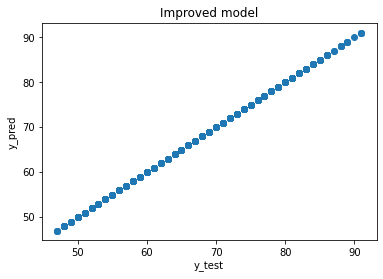

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


y = df_clean.Overall
X = df_clean.drop('Overall', axis = 1,inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

reg = LinearRegression()
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print('train score =', train_score)
print('test score = ', test_score)

y_pred = reg.predict(X_test) 

plt.scatter(y_test, y_pred)
plt.title("Improved model")
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()